In [ ]:
# ============================
#       UNIFORM GRID NODES
# ============================

import numpy as np

GRID = 17       # grid count per axis → 17×17 = 289 nodes
SPACING = 3.0 # distance between nodes

coords = []
# Calculate the offset for centering the grid
GRID_OFFSET = GRID // 2

for i in range(GRID):
    for j in range(GRID):
        # Calculate coordinates centered around (0, 0)
        x_coord = (i - GRID_OFFSET) * SPACING
        y_coord = (j - GRID_OFFSET) * SPACING
        coords.append((x_coord, y_coord))

# Convert the list of coordinates to a NumPy array for efficient handling
nodes = np.array(coords)

with open("ground_nodes.txt", "w") as f:
    f.write(";".join([f"{x:.6f},{y:.6f}" for x, y in nodes]))

print(f"Generated {GRID * GRID} UNIFORM GRID nodes and saved to ground_nodes.txt")


# Display the first 10 nodes for inspection
print("\nFirst 10 generated nodes:")
print(nodes[:10])

Generated 289 UNIFORM GRID nodes and saved to ground_nodes.txt

First 10 generated nodes:
[[-24. -24.]
 [-24. -21.]
 [-24. -18.]
 [-24. -15.]
 [-24. -12.]
 [-24.  -9.]
 [-24.  -6.]
 [-24.  -3.]
 [-24.   0.]
 [-24.   3.]]


In [ ]:
# ============================
#       CLUSTERED NODES
# ============================

import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# --- Configuration for 260 nodes (within 200-300 range) ---
CLUSTER_SIZE = 120
SCATTER_SIZE = 20

# Cluster 1: Gaussian distribution centered at (-5, 5) with lower deviation (tighter cluster)
# Generates 120 nodes
cluster1 = np.random.normal(loc=[-5, 5], scale=1.2, size=(CLUSTER_SIZE, 2))

# Cluster 2: Gaussian distribution centered at (7, -3) with higher deviation (more spread out)
# Generates 120 nodes
cluster2 = np.random.normal(loc=[7, -3], scale=1.5, size=(CLUSTER_SIZE, 2))

# Scatter: Uniform distribution across a large area (-15 to 15)
# Generates 20 nodes
scatter = np.random.uniform(-15, 15, (SCATTER_SIZE, 2))

# Combine all nodes into a single array
nodes = np.vstack([cluster1, cluster2, scatter])

# SAVE ground_nodes.txt
# The file is saved in a semicolon-separated format, with coordinates as x,y
with open("ground_nodes.txt", "w") as f:
    f.write(";".join([f"{x:.6f},{y:.6f}" for x,y in nodes]))

print(f"Generated {nodes.shape[0]} CLUSTERED nodes and saved to ground_nodes.txt")

# Display the first 10 generated nodes for inspection
print("\nFirst 10 generated nodes:")
print(nodes[:10])


Generated 260 CLUSTERED nodes and saved to ground_nodes.txt

First 10 generated nodes:
[[-4.40394302  4.83408284]
 [-4.22277375  6.82763583]
 [-5.28098405  4.71903565]
 [-3.10494462  5.92092167]
 [-5.56336926  5.65107205]
 [-5.55610123  4.4411243 ]
 [-4.70964527  2.70406371]
 [-7.0699014   4.32525496]
 [-6.21539734  5.3770968 ]
 [-6.08962889  3.30523556]]


In [ ]:
# ============================
#    TRUNCATED GAUSSIAN NODES
# ============================

import numpy as np
from scipy.stats import truncnorm
import time

# Set a seed for reproducibility
np.random.seed(42)

# --- Configuration ---
NODE_COUNT = 250   # Total nodes (within the 200-300 range)
MEAN = 0.0         # Center of the distribution (mu)
STD_DEV = 3.0      # Standard deviation (sigma)
BOUND_MIN = -10.0  # Lower bound for truncation (a)
BOUND_MAX = 10.0   # Upper bound for truncation (b)

# --- Truncated Normal Distribution ---

# Convert the bounds to standard normal scale (z-scores)
# a = (BOUND_MIN - MEAN) / STD_DEV
# b = (BOUND_MAX - MEAN) / STD_DEV
a_norm = (BOUND_MIN - MEAN) / STD_DEV
b_norm = (BOUND_MAX - MEAN) / STD_DEV

# Create the truncated normal distribution object
# We use the same parameters for X and Y, resulting in a circular/square-like bounded cluster
t_start = time.time()
truncated_dist = truncnorm(a=a_norm, b=b_norm, loc=MEAN, scale=STD_DEV)

# Generate the data
# We use .rvs (random variates) to generate 2D data (NODE_COUNT rows, 2 columns)
nodes = truncated_dist.rvs(size=(NODE_COUNT, 2))
t_gen = time.time() - t_start

# SANITY CHECK: Ensure all nodes are within the bounds
assert np.all(nodes >= BOUND_MIN) and np.all(nodes <= BOUND_MAX), "Nodes generated outside the bounds!"

# SAVE ground_nodes.txt
# The file is saved in a semicolon-separated format, with coordinates as x,y
with open("ground_nodes.txt", "w") as f:
    f.write(";".join([f"{x:.6f},{y:.6f}" for x,y in nodes]))

print(f"Generated {NODE_COUNT} TRUNCATED GAUSSIAN nodes.")
print(f"Distribution Parameters: Mean={MEAN}, StdDev={STD_DEV}, Bounds=[{BOUND_MIN}, {BOUND_MAX}]")
print(f"Node generation time: {t_gen:.4f}s")

# Display the first 10 generated nodes for inspection
print("\nFirst 10 generated nodes:")
print(nodes[:10])

Generated 250 TRUNCATED GAUSSIAN nodes.
Distribution Parameters: Mean=0.0, StdDev=3.0, Bounds=[-10.0, 10.0]
Node generation time: 0.0031s

First 10 generated nodes:
[[-0.9587051   4.9441133 ]
 [ 1.85475128  0.74897201]
 [-3.0291714  -3.02947314]
 [-4.7034277   3.32112333]
 [ 0.76802845  1.64172835]
 [-6.10080477  5.62077398]
 [ 2.88817666 -2.39244205]
 [-2.72219608 -2.70433156]
 [-1.53527372  0.1861251 ]
 [-0.51382767 -1.6478257 ]]


In [ ]:
# ============================
#       RANDOM SCATTER NODES
# ============================

import numpy as np

# Updated to generate 250 nodes
N = 250          # number of nodes (within the 200-300 range)
FIELD = 30.0     # field size (30x30 square area)

np.random.seed(42)
# Generate N nodes uniformly distributed between -FIELD/2 and FIELD/2 (i.e., -15.0 to 15.0)
nodes = np.random.uniform(-FIELD/2, FIELD/2, (N, 2))

# SAVE ground_nodes.txt
with open("ground_nodes.txt", "w") as f:
    f.write(";".join([f"{x:.6f},{y:.6f}" for x,y in nodes]))

print(f"Generated {N} RANDOM SCATTER nodes and saved to ground_nodes.txt")

# Show nodes
nodes

Generated 250 RANDOM SCATTER nodes and saved to ground_nodes.txt


array([[ -3.76379643,  13.52142919],
       [  6.95981825,   2.95975453],
       [-10.31944079, -10.32016439],
       [-13.25749163,  10.98528437],
       [  3.03345035,   6.24217733],
       [-14.38246517,  14.09729556],
       [  9.97327922,  -8.62982668],
       [ -9.54525098,  -9.4978647 ],
       [ -5.87273271,   0.74269295],
       [ -2.04164944,  -6.26312579],
       [  3.35558684, -10.81518418],
       [ -6.23566054,  -4.0091447 ],
       [ -1.31790047,   8.55527884],
       [ -9.00978654,   0.42703315],
       [  2.77243707, -13.60648762],
       [  3.22634556,  -9.88427629],
       [-13.04845221,  13.46656612],
       [ 13.96896099,   9.25192044],
       [ -5.86158692, -12.06983658],
       [  5.5269908 ,  -1.79542519],
       [-11.33885295,  -0.1446927 ],
       [-13.96834437,  12.27961206],
       [ -7.23660055,   4.87566853],
       [ -5.64866772,   0.60204064],
       [  1.40130838,  -9.45436633],
       [ 14.08753883,   8.2539847 ],
       [ 13.18496825,  11.84482051],
 

Loaded nodes: 289
Candidates: 1601

=================== OPTIMIZED METRICS ===================
Total Nodes:                289
GA Stops:                   56
Coverage:                    100%
Total Path Distance:        482.49 m
Total Mission Time:         522.25 s

=================== BASELINE METRICS ====================
Naive Stops:                289
Naive Distance:             897.94 m
Naive Mission Time:         1604.97 s

==================== IMPROVEMENT ========================
Improvement Over Baseline:  67.46%



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

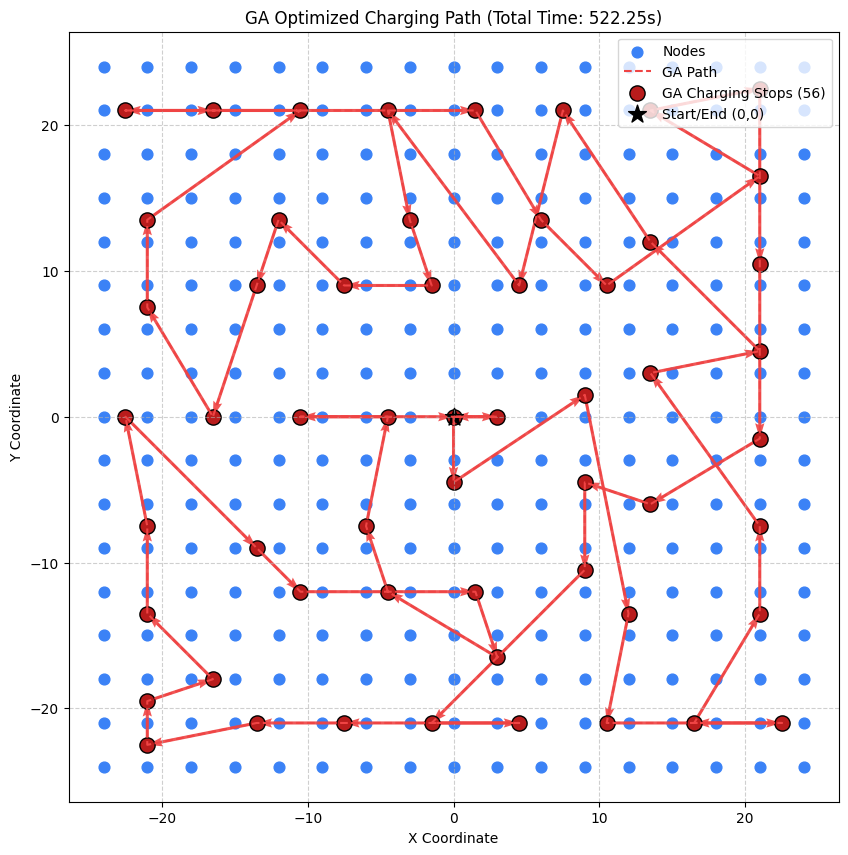

In [ ]:
# ============================================================
#        CLEAN + ROTATION-AWARE OPTIMIZER (GA + Greedy)
#        With Round Trip, NN Baseline, Stop Reports
# ============================================================

!pip install numpy scipy matplotlib

import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import math, random, itertools, time
from google.colab import files


# ============================================================
#                PARAMETERS & ROBOT MODEL
# ============================================================
R = 4.0                     # charging radius
v_lin = 2.0                 # linear speed (m/s)
omega = np.deg2rad(90)      # angular speed (rad/s)  (robot rotates 90° per second)
t_d = 4.0                   # dwell time at each stop
start = np.array([0.0, 0.0])

# ============================================================
#               LOAD NODES FROM ground_nodes.txt
# ============================================================
with open("ground_nodes.txt","r") as f:
    txt = f.read().strip()

parts = [p.strip() for p in txt.split(";")]
nodes = np.array([[float(a), float(b)] for a,b in (p.split(",") for p in parts)])
print("Loaded nodes:", len(nodes))


# ============================================================
#            ROTATION + TRANSLATION TRAVEL TIME
# ============================================================
def travel_time(p1, p2):
    dist = np.linalg.norm(p2 - p1)
    ang = 0.0 if dist < 1e-9 else omega      # assume one 90° reorientation per move
    return dist / v_lin + (ang / omega)      # rotation time = 1s per turn


# ============================================================
#            DELAUNAY-BASED CANDIDATE GENERATION
# ============================================================
def generate_candidates(nodes, R):
    if len(nodes) < 3:
        return list(nodes), [set([i]) for i in range(len(nodes))]

    tri = Delaunay(nodes)
    edges = set()
    for s in tri.simplices:
        for i,j in itertools.combinations(s,2):
            edges.add(tuple(sorted([i,j])))

    cand, cov = [], []

    def add(pt):
        d = np.linalg.norm(nodes - pt, axis=1)
        C = set(np.where(d <= R)[0])
        if C:
            cand.append(pt)
            cov.append(C)

    # midpoints
    for i,j in edges:
        add((nodes[i]+nodes[j])/2)
    # centroids
    for s in tri.simplices:
        add(np.mean(nodes[s], axis=0))
    # fallback
    for p in nodes:
        add(p)

    return cand, cov


# ============================================================
#                   GREEDY STOP SELECTION
# ============================================================
def greedy_selection(candidates, covsets):
    remaining = set(range(len(nodes)))
    curr = start.copy()
    stops, stop_covers = [], []

    while remaining:
        best = None
        best_score = -1

        for i, c in enumerate(candidates):
            new = covsets[i] & remaining
            if not new:
                continue

            score = len(new) / (travel_time(curr, c) + t_d)
            if score > best_score:
                best_score = score
                best = (i, c, new)

        if best is None:
            break

        idx, stop, newly = best
        stops.append(stop)
        stop_covers.append(sorted(newly))
        remaining -= newly
        curr = stop

    return stops, stop_covers


# ============================================================
#                 GA ROUTE OPTIMIZATION
# ============================================================
def route_cost(order, stops):
    """Full loop cost: start -> stops -> start, with rotation time."""
    curr = start
    dist = 0
    rot_total = 0

    for i in order:
        nxt = stops[i]
        d = np.linalg.norm(nxt - curr)
        dist += d
        rot_total += 1      # constant 1-second rotation per turn
        curr = nxt

    # return to start
    dist += np.linalg.norm(start - curr)
    rot_total += 1

    time_total = dist / v_lin + rot_total * 1.0 + len(order)*t_d
    return time_total, dist


def GA_optimize(stops, generations=200, pop_size=100):
    n = len(stops)
    if n == 0:
        return []

    # initial population
    pop = [random.sample(range(n), n) for _ in range(pop_size)]

    def fitness(o):
        return -route_cost(o, stops)[0]     # minimize time

    for _ in range(generations):
        pop.sort(key=fitness, reverse=True)
        new_pop = pop[:2]                   # elitism

        while len(new_pop) < pop_size:
            a, b = random.sample(pop[:20], 2)

            i, j = sorted(random.sample(range(n), 2))
            child = [-1]*n
            child[i:j] = a[i:j]

            pos = j
            for gene in b:
                if gene not in child:
                    child[pos % n] = gene
                    pos += 1

            if random.random() < 0.2:
                u, v = random.sample(range(n), 2)
                child[u], child[v] = child[v], child[u]

            new_pop.append(child)

        pop = new_pop

    return pop[0]


# ============================================================
#                       BASELINE (NN)
# ============================================================
def nn_order(points):
    n = len(points)
    unused = set(range(n))

    start_idx = min(range(n), key=lambda i: np.linalg.norm(points[i] - start))
    path = [start_idx]
    unused.remove(start_idx)
    curr = start_idx

    while unused:
        nxt = min(unused, key=lambda j: np.linalg.norm(points[j] - points[curr]))
        unused.remove(nxt)
        path.append(nxt)
        curr = nxt

    return path


def baseline_cost(nodes):
    order = nn_order(nodes)
    curr = start
    dist = np.linalg.norm(nodes[order[0]] - curr)

    for i in range(len(order)-1):
        dist += np.linalg.norm(nodes[order[i+1]] - nodes[order[i]])

    dist += np.linalg.norm(start - nodes[order[-1]])

    baseline_time = dist/v_lin + len(nodes)*t_d
    return dist, baseline_time


# ============================================================
#                  RUN FULL PIPELINE
# ============================================================
T0 = time.time()

# candidates
candidates, covsets = generate_candidates(nodes, R)
print("Candidates:", len(candidates))

# greedy
stops, stop_cov = greedy_selection(candidates, covsets)

# GA
order = GA_optimize(stops)
ga_stops = [stops[i] for i in order]

ga_time, ga_dist = route_cost(order, stops)

# baseline
base_dist, base_time = baseline_cost(nodes)

print("\n=================== OPTIMIZED METRICS ===================")
print(f"Total Nodes:                {len(nodes)}")
print(f"GA Stops:                   {len(ga_stops)}")
print(f"Coverage:                    100%")
print(f"Total Path Distance:        {ga_dist:.2f} m")
print(f"Total Mission Time:         {ga_time:.2f} s\n")

print("=================== BASELINE METRICS ====================")
print(f"Naive Stops:                {len(nodes)}")
print(f"Naive Distance:             {base_dist:.2f} m")
print(f"Naive Mission Time:         {base_time:.2f} s\n")

print("==================== IMPROVEMENT ========================")
print(f"Improvement Over Baseline:  {(base_time-ga_time)/base_time*100:.2f}%")
print("==========================================================\n")

# ============================================================
#               SAVE PATHS FOR VISUALIZATION
# ============================================================
full_ga = [start] + ga_stops + [start]

np.savetxt("optimal_path.txt",
           np.array(full_ga),
           delimiter=",",
           fmt="%.6f")

files.download("optimal_path.txt")

# ============================================================
#                       VISUALIZATION
# ============================================================
plt.figure(figsize=(10,10))

# Plot all nodes
plt.scatter(nodes[:,0], nodes[:,1], s=60, c="#3b82f6", label="Nodes")

# Convert GA path to array
g = np.array(full_ga)

# Plot GA route (dashed red)
plt.plot(g[:,0], g[:,1], "--", color="#ef4444", label="GA Path")

# Plot arrows showing travel direction

for i in range(len(g)-1):
    x1,y1 = g[i]
    x2,y2 = g[i+1]
    plt.quiver(x1, y1, x2 - x1, y2 - y1,
               angles="xy", scale_units="xy", scale=1,
               width=0.004, color="#ef4444", alpha=0.9)

# 🔴 Plot GA stops (RED CIRCLES)
if len(ga_stops) > 0:
    ga_arr = np.array(ga_stops)
    plt.scatter(ga_arr[:,0], ga_arr[:,1],
                s=120, c="#b91c1c", marker="o", edgecolors="black",
                label=f"GA Charging Stops ({len(ga_stops)})")

# Plot start/end point
plt.scatter([0], [0], s=180, c="black", marker="*", label="Start/End (0,0)")

plt.title(f"GA Optimized Charging Path (Total Time: {ga_time:.2f}s)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True, linestyle="--", alpha=0.6)
plt.gca().set_aspect("equal", adjustable="box")
plt.legend()
plt.show()
